In [3]:
%cd /content/drive/MyDrive/Machine Learning/Lab08

/content/drive/MyDrive/Machine Learning/Lab08


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Step 1.1: Load the library
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist # MNIST dataset is included in Keras
import numpy as np


# Step 1.2: Load the dataset
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# Step 1.3: Scale the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train scaled", X_train_scaled.shape)
print("X_test scaled", X_test_scaled.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)
X_train scaled (60000, 784)
X_test scaled (10000, 784)


In [9]:
# Step 2.1: fit the model on the scaled data (X_train_scaled)
# Note: 1~2 minutes to run on this data to get the mean of optimal clusters (centroid).
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10)
kmeans_model.fit(X_train_scaled)


# Step 2.2: After the clustering is done, we can predict the cluster labels.
# This will returns a cluster label for each sample, indicating to which cluster a sample belongs.
# Note: this is the class label, not image label
train_cluster_labels = kmeans_model.predict(X_train_scaled)
print("train_cluster_labels: ", train_cluster_labels)
# Step 2.3: We can also use the model to predict cluster labels for any new test data.
# The new data points will be assigned to clusters whose centroid is closest.

X_test_scaled= scaler.transform(X_test)
test_cluster_labels = kmeans_model.predict(X_test_scaled)
print("test_cluster_labels: ", test_cluster_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


train_cluster_labels:  [1 4 2 ... 1 6 9]
test_cluster_labels:  [3 8 9 ... 3 3 6]


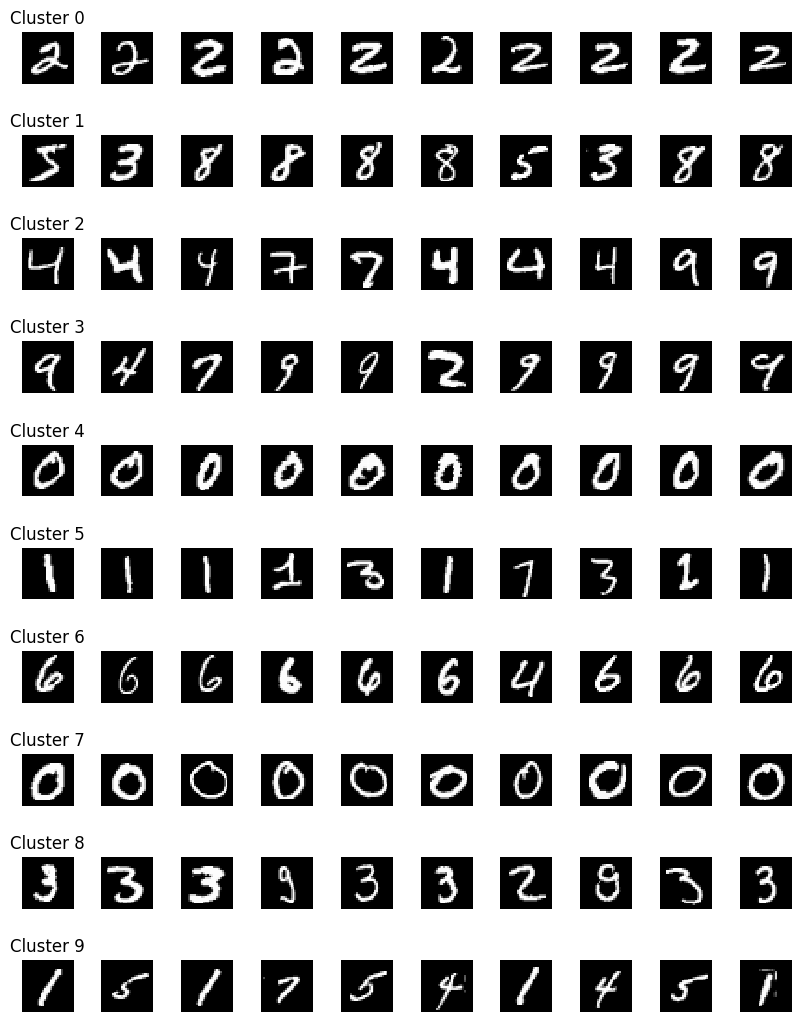

In [10]:
# Step 3: visualize the images in each cluster from K-means
img_idx = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
for cluster_id in set(train_cluster_labels):
    cluster_images = X_train_scaled[train_cluster_labels==cluster_id] ## get images within same clusters

    #select first 10 for visualization

    for i in range(10):
        plt.subplot(10,10,img_idx+1)
        plt.imshow(cluster_images[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.axis('off')
        if i == 0: plt.title("Cluster {}".format(cluster_id))
        img_idx += 1

In [11]:
# Step 4.1 Evaluate the clustering accuracy on the training data (Assume the true labels are known)
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':train_cluster_labels, 'true_labels': y_train })
print(evaluation_df)
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

       cluster_labels  true_labels
0                   1            5
1                   4            0
2                   2            4
3                   9            1
4                   3            9
...               ...          ...
59995               1            8
59996               1            3
59997               1            5
59998               6            6
59999               9            8

[60000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,17,9,4196,218,38,15,87,39,56,13
1,187,10,156,1040,21,1523,95,10,3453,69
2,37,6,174,176,3189,374,82,1795,193,2901
3,14,9,70,49,1940,346,1,3774,182,2461
4,2506,0,95,120,10,244,118,14,31,19
5,3,3717,365,427,159,161,270,327,296,240
6,181,9,212,58,165,122,4915,4,47,7
7,2794,0,10,19,10,65,100,15,38,37
8,163,5,328,3922,1,1776,28,5,1142,86


In [12]:
# Step 4.1 Evaluate the clustering accuracy on the test data (Assume the true labels are known)
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':test_cluster_labels, 'true_labels': y_test })
print(evaluation_df)
contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

      cluster_labels  true_labels
0                  3            7
1                  8            2
2                  9            1
3                  4            0
4                  2            4
...              ...          ...
9995               0            2
9996               8            3
9997               3            4
9998               3            5
9999               6            6

[10000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,2,1,709,40,5,4,18,13,6,3
1,18,1,27,146,5,280,19,1,585,13
2,4,0,30,15,559,56,22,292,34,541
3,3,0,11,7,310,70,1,603,35,387
4,423,0,19,18,1,39,24,1,11,10
5,0,660,59,73,30,23,28,59,34,29
6,30,2,25,7,35,19,794,1,10,4
7,447,0,3,1,1,9,20,1,6,4
8,48,2,65,696,0,287,2,0,209,7


In [13]:
# Step 6.1: Load the library
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist # MNIST dataset is included in Keras
from keras.utils import np_utils
import numpy as np


# Step 6.2: Load the MNIST dataset
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
# Step 6.3: Scale the MNIST data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 6.4: Generate one-hot encoding for labels
nb_classes = 10
y_train_categorical = np_utils.to_categorical(y_train, nb_classes)
y_test_categorical = np_utils.to_categorical(y_test, nb_classes)
# Step 6.5: Create one neural network using Keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu')) # Hidden layer output
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

print("X_train shape_scaled", X_train_scaled.shape)
print("X_test shape_scaled", X_test_scaled.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)   

In [14]:
#step 7.1: training the network
history = model.fit(X_train_scaled, y_train_categorical, validation_split = 0.1, batch_size=128, epochs=10, verbose=1)

# Step 7.2: Evaluate on the test set
score = model.evaluate(X_test_scaled, y_test_categorical)
print('Test score:', score)

#training accuracy and training validation
print("Training accuracy:", history.history['accuracy'])
print("Validation accuracy:", history.history['val_accuracy'])


Epoch 1/10
422/422 [==============================] - 7s 14ms/step - loss: 0.2731 - accuracy: 0.9192 - val_loss: 0.1200 - val_accuracy: 0.9653
Epoch 2/10
422/422 [==============================] - 7s 17ms/step - loss: 0.1081 - accuracy: 0.9668 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 3/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 4/10
422/422 [==============================] - 7s 18ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0704 - val_accuracy: 0.9788
Epoch 5/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.0650 - val_accuracy: 0.9818
Epoch 6/10
422/422 [==============================] - 9s 20ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0758 - val_accuracy: 0.9790
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.0806 - val_accuracy: 0.9795

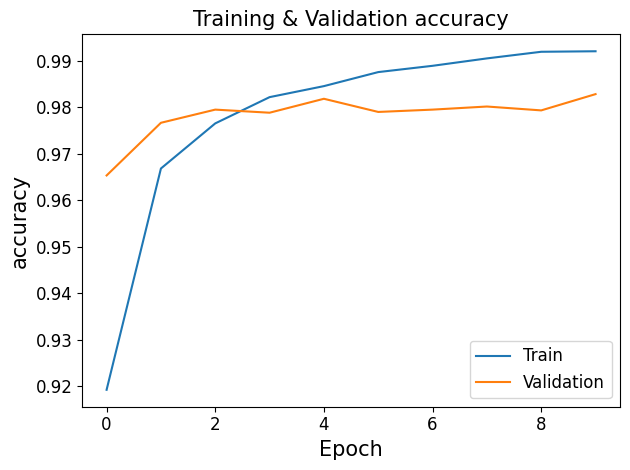

In [15]:
#Visualize the learning curves
# Step 19.2: Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()


In [16]:
### Step 8a: get all layers of the model and save into a list
model_layers = model.layers
print("model_layers:", model_layers)
###Step 8b: Let's select last second layer as the output for feature extractor
# model.layers[-3].output corresponds to the output of last second layer
print("model.layers[-3].output:", model.layers[-3].output)
###Step 8c: select the first layer as the input of feature extractor
# model.layers[0].input corresponds to the input of the first layer
print("model.layers[0].input: ", model.layers[0].input)
###Step 8d: Then we can build a feature extractor function to map the input to feature vectors
from keras import backend as K
Get_Hidden_Layered_Output = K.function([model.layers[0].input], [model.layers[-3].output])

###  Let's apply the feature extractor on one image, and check the feature vector
X_test_featureVector = Get_Hidden_Layered_Output([X_test_scaled])[0]

print("extracted_features:", X_test_featureVector)
print("shape of original features:", X_test_scaled.shape)
print("shape of extracted features:", X_test_featureVector.shape)

model_layers: [<keras.layers.core.dense.Dense object at 0x7ff1053f6a40>, <keras.layers.core.activation.Activation object at 0x7ff1053f7a00>, <keras.layers.regularization.dropout.Dropout object at 0x7ff11fb79150>, <keras.layers.core.dense.Dense object at 0x7ff11fb78c70>, <keras.layers.core.activation.Activation object at 0x7ff1053f6bf0>, <keras.layers.core.dense.Dense object at 0x7ff11fb7a5f0>, <keras.layers.core.activation.Activation object at 0x7ff11fb7b6a0>]
model.layers[-3].output: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='activation_1/Relu:0', description="created by layer 'activation_1'")
model.layers[0].input:  KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
extracted_features: [[0.50542676 1.0219853  0.         ... 0.         3.289032   3.5873756 ]
 [0.         1.8761177  0.         ... 0.         0.4800998  0.        ]
 [1.88

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


test_cluster_labels:  [3 8 9 ... 3 3 6]


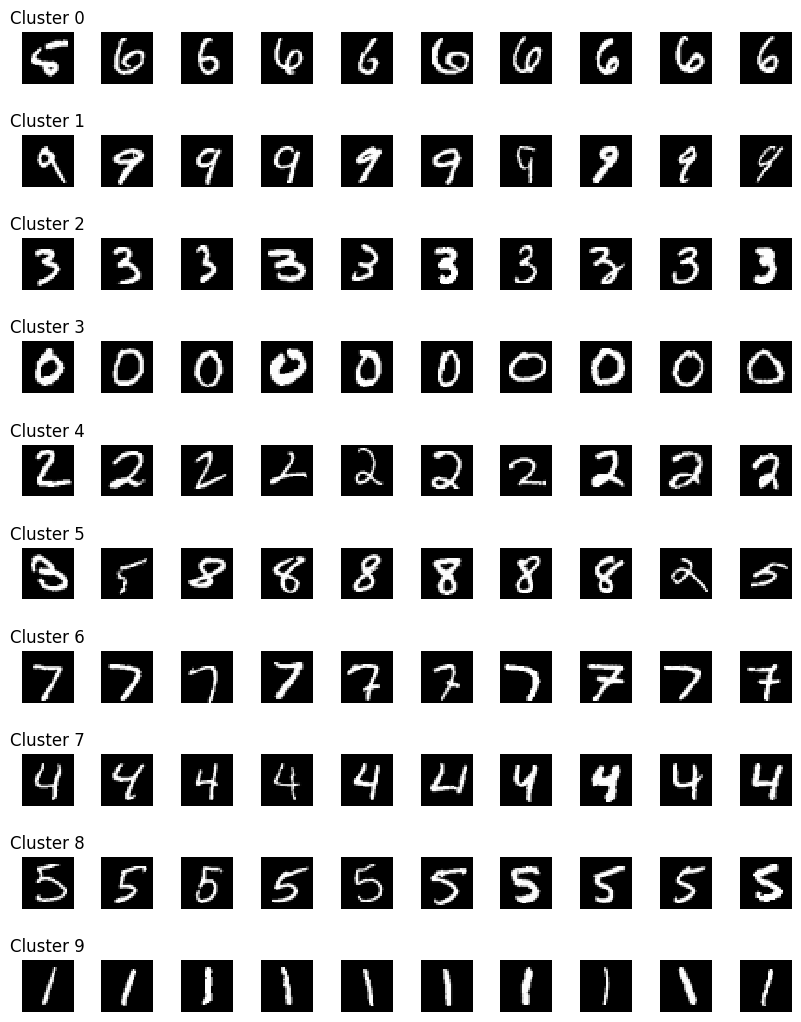

In [17]:
# Step 9.1 Apply the clustering algorithms on the hidden features of the images
from sklearn.cluster import KMeans
kmeans_model = KMeans(init='k-means++', n_clusters=10)
kmeans_model.fit(X_test_featureVector)


# Step 9.2. After the clustering is done, we can predict the cluster labels.
# This will returns a cluster label for each sample, indicating to which cluster a sample belongs.
# Note: this is the class label, not the image label
pred_cluster_labels = kmeans_model.predict(X_test_featureVector)
print("test_cluster_labels: ", test_cluster_labels)

# Step 9.3  Get clustering labels and visualize the clusters
img_idx = 0
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
for cluster_id in set(pred_cluster_labels):
    cluster_images = X_test_scaled[pred_cluster_labels==cluster_id]
    #select first 10 for visualization
    for i in range(10):
        plt.subplot(10,10,img_idx+1)
        plt.imshow(cluster_images[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.axis('off')

        if i == 0: plt.title("Cluster {}".format(cluster_id))
        img_idx += 1

In [18]:
# Step 10. Evaluate the clustering accuracy (Assume the true labels are known)
import pandas as pd
evaluation_df = pd.DataFrame({'cluster_labels':pred_cluster_labels, 'true_labels': y_test })
print(evaluation_df)

contingency_table = pd.crosstab(evaluation_df['cluster_labels'],evaluation_df['true_labels'])
contingency_table

      cluster_labels  true_labels
0                  6            7
1                  4            2
2                  9            1
3                  3            0
4                  7            4
...              ...          ...
9995               4            2
9996               2            3
9997               7            4
9998               8            5
9999               0            6

[10000 rows x 2 columns]


true_labels,0,1,2,3,4,5,6,7,8,9
cluster_labels,,,,,,,,,,
0,3,1,8,0,6,8,932,0,0,0
1,0,0,0,3,26,5,0,11,5,975
2,0,0,0,942,0,6,0,0,0,3
3,964,0,3,0,0,1,1,2,0,2
4,0,4,976,13,0,0,0,8,1,0
5,11,4,36,44,7,75,19,12,962,15
6,1,0,2,4,0,1,0,967,2,1
7,1,0,6,0,941,0,2,5,4,5
8,0,0,0,3,0,796,1,0,0,2


In [19]:
# Step 11a: Try different number of clusters, and evaluate the clusters using silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow={"inertia":[],"clusters":[]}
silhouette={"silhouette":[],"clusters":[]}

for i in range(3,15):
   print("Clustering data into ", i, ' groups')
   kmeans_model=KMeans(i)
   elbow["clusters"].append(i)
   kmeans_model.fit(X_test_featureVector) # use test set for practice in this lab.
   elbow["inertia"].append(kmeans_model.inertia_)
   silhouette["silhouette"].append(silhouette_score(X_test_featureVector,kmeans_model.labels_))

Clustering data into  3  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  4  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  5  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  6  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  7  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  8  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  9  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  10  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  11  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  12  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  13  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering data into  14  groups


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


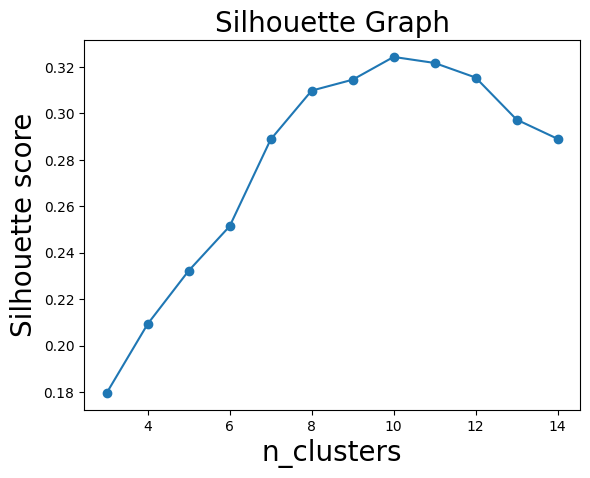

In [20]:
# Step 12b:  Visualize the optimal clusters based on Silhouette
plt.scatter(x=elbow["clusters"],y=silhouette["silhouette"])
plt.plot(elbow["clusters"], silhouette["silhouette"])
plt.xlabel("n_clusters", size=20)
plt.ylabel("Silhouette score", size=20)
plt.title("Silhouette Graph", size=20)
plt.show()

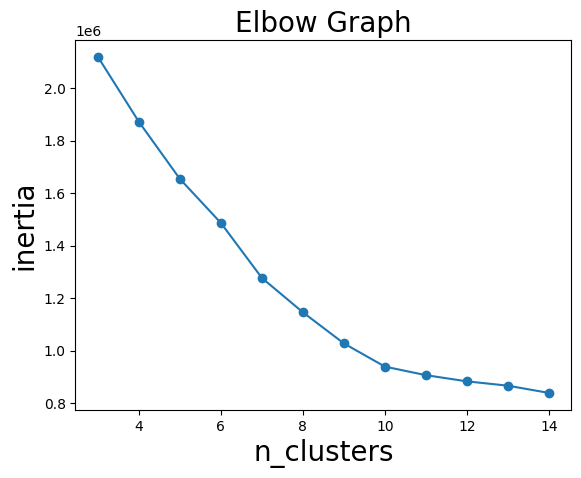

In [21]:
# Step 12c:  Visualize the optimal clusters based on Inertia
plt.scatter(x=elbow["clusters"],y=elbow["inertia"])
plt.plot(elbow["clusters"], elbow["inertia"])
plt.xlabel("n_clusters", size=20)
plt.ylabel("inertia", size=20)
plt.title("Elbow Graph", size=20)
plt.show()

In [22]:
## step 13.1 Sample a small dataset from the test set
import numpy as np
rand_id = np.random.choice(range(len(X_test_featureVector)), size=40) # sample 40 images
sub_sample_images = X_test[rand_id]
sub_sample_featureVector = X_test_featureVector[rand_id] # use extracted features for better clustering
sub_sample_labels = y_test[rand_id]

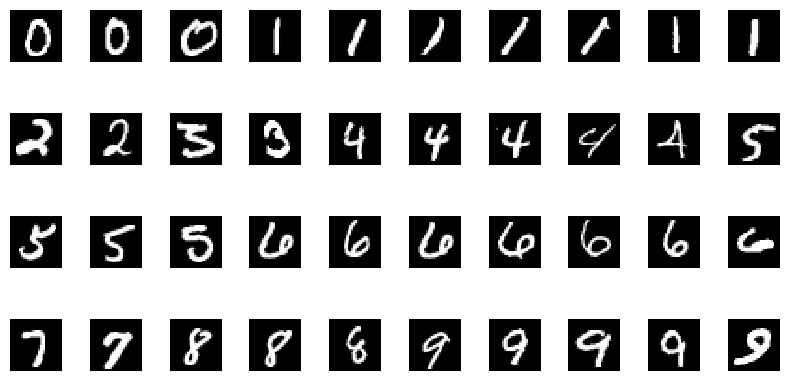

In [23]:
# Step 13.2: visualize the images in the sampled data set
img_idx = 0
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)

for digit_id in set(sub_sample_labels):
   digit_images = sub_sample_images[sub_sample_labels==digit_id] ## get images within same clusters
   for i in range(len(digit_images)):
      plt.subplot(10,10,img_idx+1)
      plt.imshow(digit_images[i].reshape(28,28), cmap='gray', interpolation='none')
      plt.axis('off')
      img_idx += 1

In [24]:
# Step 13.3: normalize by each sample before applying hierarchical clustering
from scipy import stats
data_featureVector_scaled = stats.zscore(sub_sample_featureVector, axis=1, ddof=1)

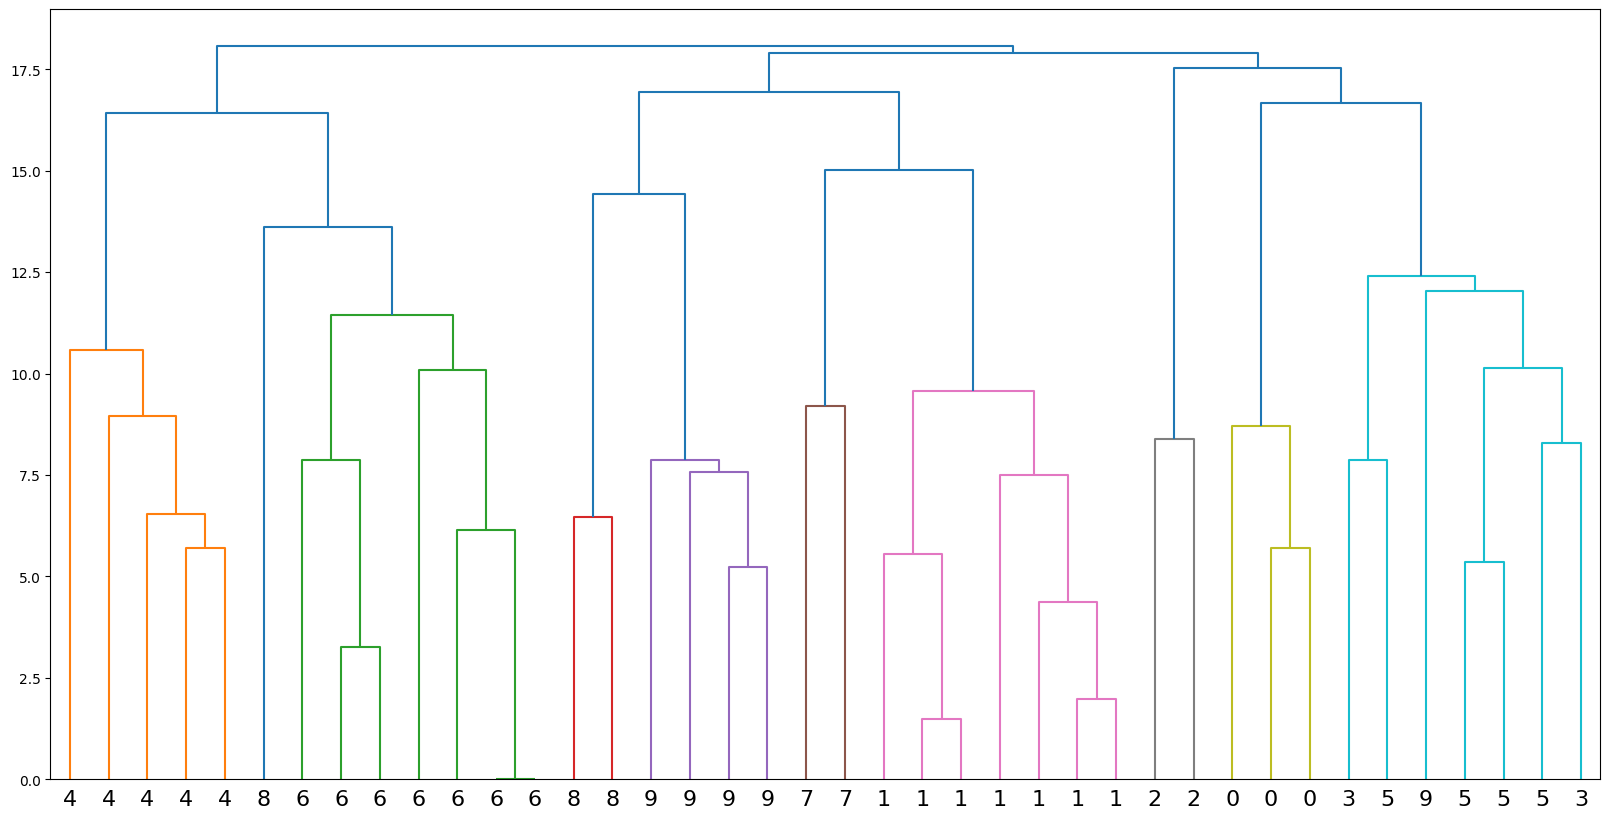

In [25]:
# Step 13.4: Apply hierarchical clustering using complete linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
fig = plt.figure(figsize=(20,10))
mergings = linkage(data_featureVector_scaled, method = 'complete') # select a linkage, also try 'single' and 'average'
dendrogram(mergings, labels = sub_sample_labels, leaf_rotation=0, leaf_font_size=16)
plt.show()



In [26]:
# Step 13.5: Generate clusters from the dendrogram
# Based on visual inspection, I set the height cutoff to 12
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 12, criterion = 'distance')
print(labels)

[11  8  5  7  2  2  2  5  4  1  1  6  1  5  7  2  7 11  6  5  2  7  9  7
 11  9  9  7 12  7 11  2  1  8  4  2  1  3 10 10]


In [27]:
# Step 14.1  For visualization of high-dimensional data, we need to apply PCA for dimension reduction first
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
pca_data = pca.transform(X_train_scaled)

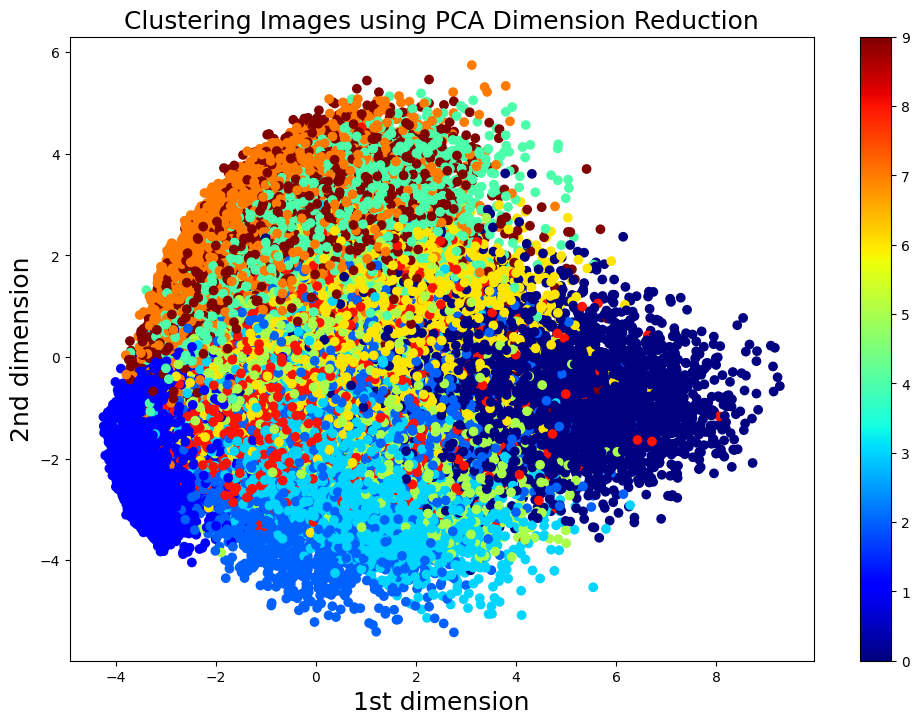

In [28]:
# treat the first two PCs as x and y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c= y_train, cmap='jet')
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2nd dimension", fontsize=18)
plt.title("Clustering Images using PCA Dimension Reduction", fontsize=18)
plt.colorbar()
plt.show()


<ipython-input-29-bdb7b6832f11>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='jet')


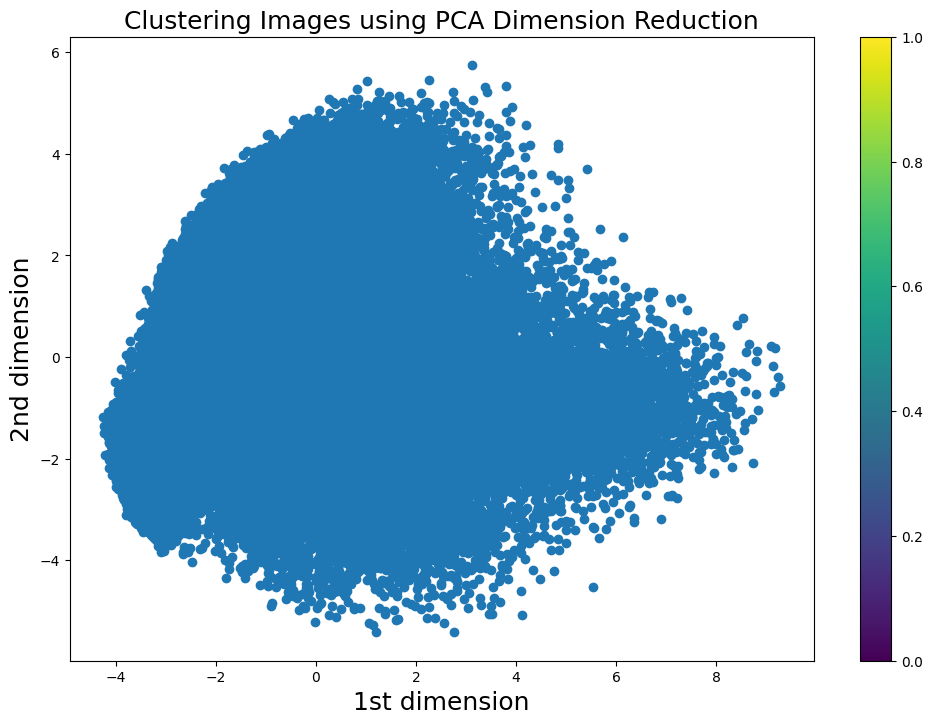

In [29]:
# treat the first two PCs as x and y axis
import matplotlib.pyplot as plt
labels = [0, 1, 2, 0, 1, 2]

plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='jet')
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2nd dimension", fontsize=18)
plt.title("Clustering Images using PCA Dimension Reduction", fontsize=18)
plt.colorbar()
plt.show()

In [30]:
# Step 14.1: Visualize the data using T-SNE dimension reduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

# Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:
subset_X_train_scaled = X_train_scaled[0:500]
subset_y_train = y_train[0:500]
X_tsne_reduced = tsne.fit_transform(subset_X_train_scaled)

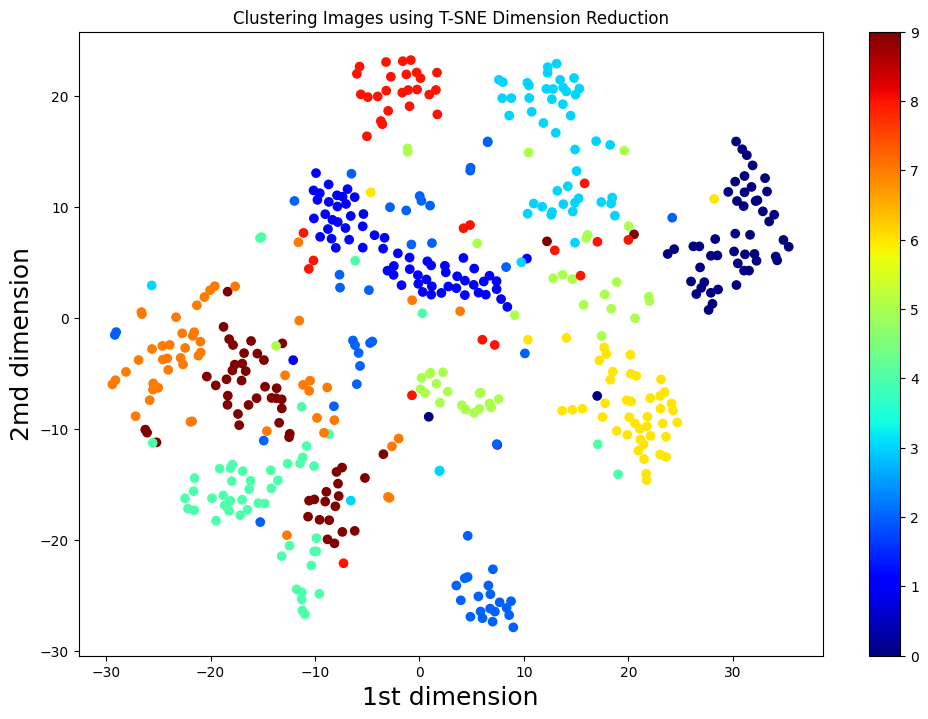

In [31]:
# Step 14.2:  visualize the T-SNE coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c= subset_y_train, cmap='jet')  # color by real labels
plt.colorbar()
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2md dimension", fontsize=18)
plt.title("Clustering Images using T-SNE Dimension Reduction", fontsize=12)
plt.show()

In [32]:
# Step 15.1: Apply PCA for dimension reduction on this extracted features
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_test_featureVector)
pca_data = pca.transform(X_test_featureVector)

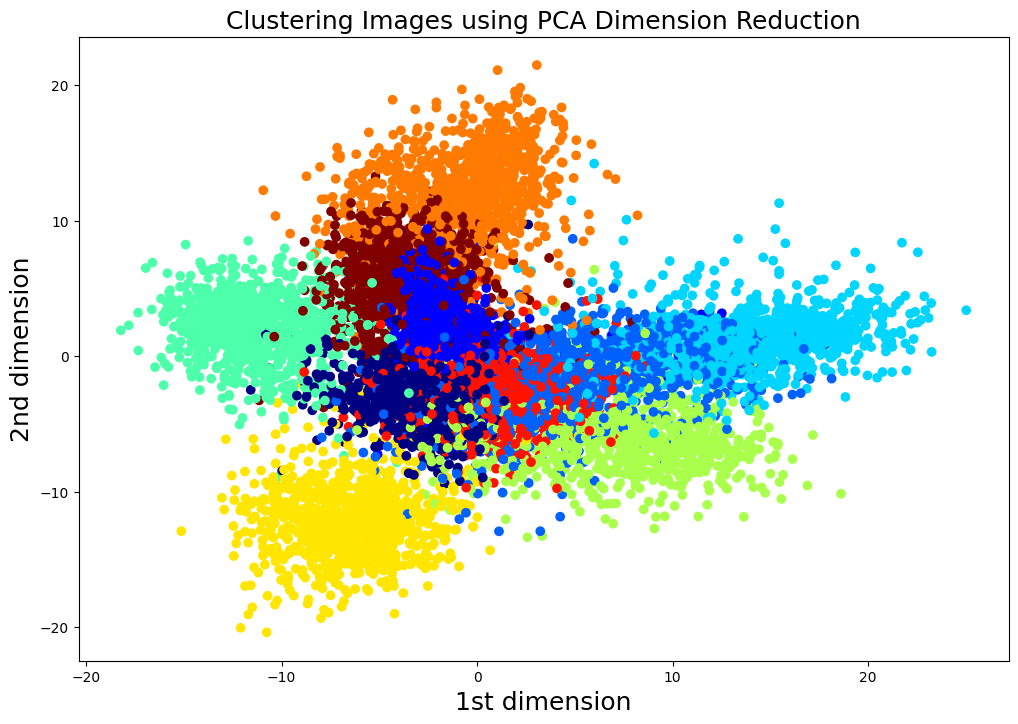

In [33]:
## Step 15.2: visualize the PCA clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c= y_test, cmap='jet') # colored by real label
plt.xlabel("1st dimension", fontsize=18)
plt.ylabel("2nd dimension", fontsize=18)
plt.title("Clustering Images using PCA Dimension Reduction", fontsize=18)
plt.show()

In [34]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_test_featureVector)
pca_data = pca.transform(X_test_featureVector)

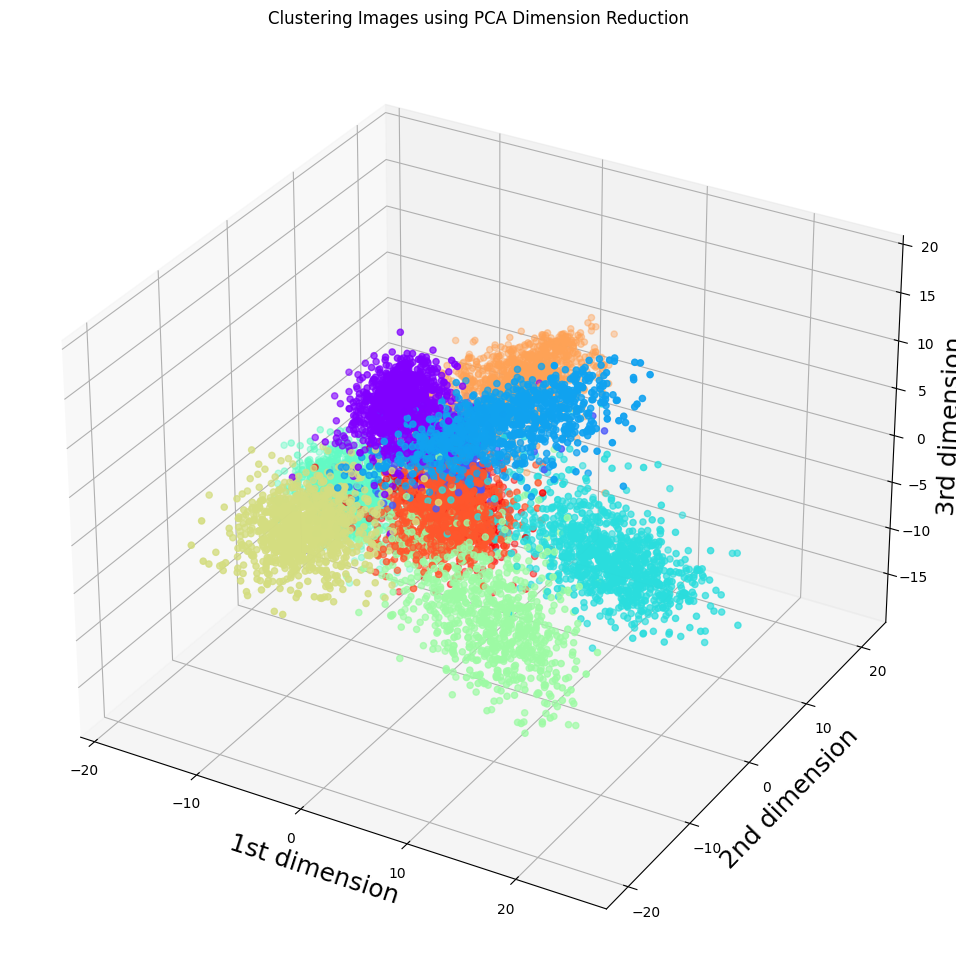

In [35]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(bottom = 0.1)
ax = plt.axes(projection ="3d")
ax.scatter3D(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y_test, cmap='rainbow')

ax.set_xlabel("1st dimension", fontsize=18)
ax.set_ylabel("2nd dimension", fontsize=18)
ax.set_zlabel("3rd dimension", fontsize=18)

ax.set_title("Clustering Images using PCA Dimension Reduction", fontsize=12)
plt.show()